In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Companies with recorded donations 

In [4]:
food = pd.read_csv("food_cleaned.csv")
food["date"] = pd.to_datetime(food["date"])
food.loc[(food["state"] != "California") & (food["state"] != "New York"), "state"] = "underdeveloped"
company_weeks = food.groupby("company")["date"].agg(lambda x: int((max(x) - min(x))/np.timedelta64(1, "W")))+ 1
company_tot_donation = food.groupby("company")["pounds"].agg(np.sum)
company_num_donation = food.groupby("company")["pounds"].count()
company_one_donation = (company_num_donation == 1).astype("int")
company_pound_per_week = company_tot_donation/company_weeks
company_avg_donation = company_tot_donation/company_num_donation
company_max_donation = food.groupby("company")["pounds"].agg(np.max)
company_min_donation = food.groupby("company")["pounds"].agg(np.min)
company_med_donation = food.groupby("company")["pounds"].agg(np.median)
company_size = food.groupby("company")["size"].first()
company_type = food.groupby("company")["type"].first()
#company_city = food.groupby("company")["city"].first()
company_state = food.groupby("company")["state"].first()
company_most_donation_weekday = food.groupby("company")["weekday"].agg(lambda x: np.argmax(x.value_counts()))
company_most_donation_weekday_frac = food.groupby("company")["weekday"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_max_weekday = food.loc[food.reset_index().groupby("company")["pounds"].idxmax()]["weekday"]
company_max_weekday.index = company_weeks.index
company_first_donation = food.loc[food.reset_index().groupby("company")["date"].idxmin()]["pounds"]
company_first_donation.index = company_weeks.index
company_most_donation_month = food.groupby("company")["month"].agg(lambda x: np.argmax(x.value_counts()))
company_most_donation_month_frac = food.groupby("company")["month"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_start_month = food.groupby("company")["month"].agg(np.min)
company = pd.DataFrame({"tot_donation": company_tot_donation, 
                       "num_donation": company_num_donation, 
                        "num_weeks": company_weeks, 
                       "avg_donation": company_avg_donation, 
                        "week_donation": company_pound_per_week,
                       "max_donation": company_max_donation, 
                        "med_donation": company_med_donation,
                        "min_donation": company_min_donation,
                        "size": company_size, "type": company_type,
                       "popular_weekday": company_most_donation_weekday,
                        "popular_month": company_most_donation_month,
                       "popular_weekday_frac": company_most_donation_weekday_frac,
                        "popular_month_frac": company_most_donation_month_frac,
                       "max_pound_weekday": company_max_weekday, "start_month": company_start_month,
                        "one_donation": company_one_donation, "state": company_state
                       })
company["top_contributor"] = company["num_donation"].apply(lambda x: 1 if x >= 50
                                                          else 0)
company.loc[company.index == "Imgur", "popular_weekday"] = "Friday"
company = company[~(company.index == "Curiodysse")]

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [5]:
company

,avg_donation,max_donation,max_pound_weekday,med_donation,min_donation,num_donation,num_weeks,one_donation,popular_month,popular_month_frac,popular_weekday,popular_weekday_frac,size,start_month,state,tot_donation,type,week_donation,top_contributor
company,,,,,,,,,,,,,,,,,,,
32BJ SEIU,27.000000,27.00,Monday,27.000,27.00,1,1,1,9,1.000000,Monday,1.000000,500.0,9,New York,27.00,other,27.000000,0
AT&T Foundry,14.947368,70.00,Monday,8.000,3.00,19,11,0,4,0.473684,Wednesday,0.526316,50.0,3,California,284.00,comm,25.818182,0
Acxiom,26.250000,50.00,Thursday,22.500,10.00,4,15,0,4,0.500000,Thursday,0.750000,5000.0,2,New York,105.00,bus,7.000000,0
"Adams & Company Real Estate, LLC",72.625000,200.00,Tuesday,57.500,8.00,8,18,0,1,0.375000,Tuesday,0.250000,200.0,1,New York,581.00,fin,32.277778,0
"Addepar, Inc.",95.875000,200.00,Friday,80.000,12.00,8,15,0,5,0.375000,Friday,1.000000,500.0,2,New York,767.00,fin,51.133333,0
Aera Technology Inc.,11.886364,50.00,Friday,10.000,4.00,44,49,0,9,0.113636,Friday,0.977273,200.0,1,California,523.00,applied,10.673469,0
Airbnb,62.400000,90.00,Thursday,70.000,24.00,5,14,0,11,0.400000,Friday,0.600000,5000.0,1,New York,312.00,sale,22.285714,0
Aramark SF,127.918919,350.00,Friday,100.000,14.00,37,49,0,9,0.135135,Friday,1.000000,10001.0,1,California,4733.00,food,96.591837,0
Audentes Therapeutics,47.857143,75.00,Tuesday,40.000,30.00,7,26,0,4,0.428571,Tuesday,0.428571,200.0,2,California,335.00,edu-health,12.884615,0


In [29]:
def ohe_max_pound_weekday(data):
    cats = data["max_pound_weekday"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data['max_pound_weekday'] = data['max_pound_weekday'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='max_weekday',
                    columns=['max_pound_weekday'], 
                    drop_first=True)
    return data

def ohe_popular_month(data):
    cats = data["popular_month"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data["popular_month"] = data['popular_month'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='pop_month',
                    columns=['popular_month'], 
                    drop_first=True)
    return data
    
def ohe_popular_weekday(data):
    cats = data["popular_weekday"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data['popular_weekday'] = data['popular_weekday'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='pop_weekday',
                    columns=['popular_weekday'], 
                    drop_first=True)
    return data

def ohe_size(data): 
    cats = data["size"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data['size'] = data['size'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='size',
                    columns=['size'], 
                    drop_first=True)
    return data

def ohe_start_month(data):
    cats = data["start_month"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data['start_month'] = data['start_month'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='start_month',
                    columns=['start_month'], 
                    drop_first=True)
    return data

def ohe_state(data):
    cats = data["state"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data['state'] = data['state'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='state',
                    columns=['state'], 
                    drop_first=True)
    return data

def ohe_type(data):
    cats = data["type"].unique().tolist()
    cat_type = CategoricalDtype(categories=cats)
    data['type'] = data['type'].astype(cat_type)
    data = pd.get_dummies(data,
                    prefix='type',
                    columns=['type'], 
                    drop_first=True)
    return data

def process_data(data):
    data = (
        data
        # Clean Data
        .pipe(ohe_max_pound_weekday)
        .pipe(ohe_popular_month)
        .pipe(ohe_popular_weekday)
        .pipe(ohe_size)
        #.pipe(ohe_start_month)
        .pipe(ohe_state)
        .pipe(ohe_type)
    )
    return data
process_data(company).to_csv("avg_week_donation.csv", sep = ",")

In [17]:
#company.to_csv("avg_week_donation_raw.csv", sep = ",")

In [8]:
company_processed = process_data(company).drop(["start_month", "num_donation", "num_weeks", "pop_month_2", "pop_month_3", "pop_month_4", "pop_month_5", "pop_month_6", "pop_month_7", "pop_month_8", "pop_month_10"], axis = 1)
#poly = PolynomialFeatures(degree = 3)
#X_ = poly.fit_transform(company_processed)
#predict_ = poly.fit_transform(company_pound_per_week)

In [10]:
#company_processed.to_csv("avg_week_donation.csv")

### All Companies that Donated 

In [90]:
#for all companies that made a donation 
food = pd.read_csv("food_full.csv")
food["date"] = pd.to_datetime(food["date"])
food.loc[(food["state"] != "California") & (food["state"] != "New York"), "state"] = "underdeveloped"
company_weeks = food.groupby("company")["date"].agg(lambda x: int((max(x) - min(x))/np.timedelta64(1, "W")))+ 1
#company_tot_donation = food.groupby("company")["pounds"].agg(np.sum)
company_num_donation = food.groupby("company")["company"].count()
company_one_donation = (company_num_donation == 1).astype("int")
#company_pound_per_week = company_tot_donation/company_weeks
#company_avg_donation = company_tot_donation/company_num_donation
#company_max_donation = food.groupby("company")["pounds"].agg(np.max)
#company_min_donation = food.groupby("company")["pounds"].agg(np.min)
#company_med_donation = food.groupby("company")["pounds"].agg(np.median)
company_size = food.groupby("company")["size"].first()
company_type = food.groupby("company")["type"].first()
company_state = food.groupby("company")["state"].first()
company_most_donation_weekday = food.groupby("company")["weekday"].agg(lambda x: np.argmax(x.value_counts()))
company_most_donation_weekday_frac = food.groupby("company")["weekday"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
#company_max_weekday = food.loc[food.reset_index().groupby("company")["pounds"].idxmax()]["weekday"]
#company_max_weekday.index = company_weeks.index
#company_first_donation = food.loc[food.reset_index().groupby("company")["date"].idxmin()]["pounds"]
#company_first_donation.index = company_weeks.index
company_most_donation_month = food.groupby("company")["month"].agg(lambda x: np.argmax(x.value_counts()))
company_most_donation_month_frac = food.groupby("company")["month"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_start_month = pd.to_datetime(food_full.groupby("company")["date"].agg(np.min)).dt.month
company = pd.DataFrame({#"tot_donation": company_tot_donation, 
                       "num_donation": company_num_donation, 
                        "num_weeks": company_weeks, 
                       #"avg_donation": company_avg_donation, 
                        #"week_donation": company_pound_per_week,
                      # "max_donation": company_max_donation, 
                       # "med_donation": company_med_donation,
                        #"min_donation": company_min_donation,
                        "size": company_size, "type": company_type,
                       "popular_weekday": company_most_donation_weekday,
                        "popular_month": company_most_donation_month,
                       "popular_weekday_frac": company_most_donation_weekday_frac,
                        "popular_month_frac": company_most_donation_month_frac,
                       #"max_pound_weekday": company_max_weekday, 
                        "start_month": company_start_month,
                        "one_donation": company_one_donation, "state": company_state
                       })
company["top_contributor"] = company["num_donation"].apply(lambda x: 1 if x >= 10
                                                          else 0)
company = company[~(company.index == "Curiodysse")]

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [91]:
company["one_donation"].value_counts()

0.0    154
1.0     87
Name: one_donation, dtype: int64

About a third of all the companies only made 1 donation 

In [93]:
company

,num_donation,num_weeks,one_donation,popular_month,popular_month_frac,popular_weekday,popular_weekday_frac,size,start_month,state,type,top_contributor
32BJ SEIU,1.0,1.0,1.0,9.0,1.000000,Monday,1.000000,500.0,9,New York,other,0
AFIP,1.0,1.0,1.0,11.0,1.000000,Tuesday,1.000000,10.0,11,underdeveloped,fin,0
ALL IN,2.0,2.0,0.0,1.0,1.000000,Friday,1.000000,10.0,1,California,food,0
AT&T Foundry,20.0,11.0,0.0,5.0,0.450000,Monday,0.500000,50.0,3,California,comm,1
Acxiom,8.0,38.0,0.0,4.0,0.375000,Thursday,0.625000,5000.0,8,New York,bus,0
"Adams & Company Real Estate, LLC",9.0,18.0,0.0,12.0,0.333333,Tuesday,0.222222,200.0,12,New York,fin,0
"Addepar, Inc.",17.0,20.0,0.0,3.0,0.294118,Friday,1.000000,500.0,1,New York,fin,1
Adore Me,1.0,1.0,1.0,4.0,1.000000,Friday,1.000000,200.0,4,New York,sale,0
Aera Technology Inc.,49.0,50.0,0.0,12.0,0.102041,Friday,0.979592,200.0,6,California,applied,1
Airbnb,7.0,15.0,0.0,11.0,0.285714,Friday,0.714286,5000.0,10,New York,sale,0


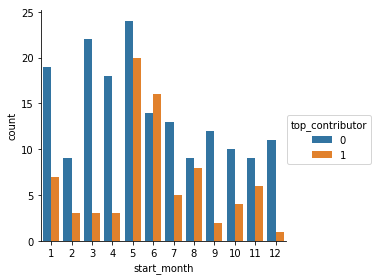

In [92]:
sns.factorplot(x = "start_month", hue = "top_contributor", data = company, kind = "count")